# **DAV LEVEL 4**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load GHG Emission data
ghgEmission = "drive/My Drive/Study/DAV/co2_data.csv"
northHemIce = "drive/My Drive/Study/DAV/north_hemisphere_ice.xlsx"
southHemIce = "drive/My Drive/Study/DAV/south_hemishpere_ice.xlsx"
df_ghg = pd.read_csv(ghgEmission)
df_northHemIce = pd.read_excel(northHemIce)
df_southHemIce = pd.read_excel(southHemIce)
# display(df_ghg)

# Set max_rows and max_columns options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
# Select a range of years (1990 to 2021)
start_year = 1990
end_year = 2021
selected_rows = df_ghg.loc[(df_ghg['year'] >= start_year) & (df_ghg['year'] <= end_year)]

In [ ]:
#value to be removed as country
values_to_remove = ['Africa (GCP)','Aland Islands','American Samoa','Asia (GCP)','Asia (excl. China and India)', 'Central America (GCP)','Europe (GCP)', 'European Union (27) (GCP)', 'Falkland Islands', 'Guernsey', 'Isle of Man', 'Jersey',
'Middle East (GCP)', 'Netherlands Antilles', 'Non-OECD (GCP)', 'OECD (GCP)', 'Oceania (GCP)','Puerto Rico','Saint Martin (French part)', 'South America (GCP)','Svalbard and Jan Mayen','United States Virgin Islands','Western Sahara','World','Europe' 'Europe (excl. EU-27)',
 'Europe (excl. EU-28)',
 'European Union (27)',
 'European Union (28)',
 'North America',
 'North America (GCP)',
 'North America (excl. USA)',
 'South America',
 'Upper-middle-income countries',
 'International transport',
 'High-income countries',
 'Asia',
 'Low-income countries',
 'Lower-middle-income countries',
 'Africa',
 'Europe',
 'Europe (excl. EU-27)',]

# Filter the DataFrame to remove rows that match the values in the array
df_filteredCountry = selected_rows[~selected_rows['country'].isin(values_to_remove)]

# Write the filtered DataFrame back to the CSV file
# display(df_filteredCountry)
# df_filteredCountry.to_csv('newData.csv', index=False)

In [ ]:
# Define columns to keep
columns_to_keep = ['country', 'year','population','cement_co2','cement_co2_per_capita','co2','co2_per_capita','coal_co2','coal_co2_per_capita','flaring_co2','flaring_co2_per_capita','gas_co2','gas_co2_per_capita','land_use_change_co2','land_use_change_co2_per_capita','methane','methane_per_capita','nitrous_oxide','nitrous_oxide_per_capita','oil_co2','oil_co2_per_capita','total_ghg']

# Keep only specified columns in the DataFrame
df_final = df_filteredCountry[columns_to_keep]

# display(df_final)

In [ ]:
missing_percentages = df_final.isnull().sum() / len(df_final) * 100
display(missing_percentages)

country                            0.000000
year                               0.000000
population                         0.269848
cement_co2                         2.698480
cement_co2_per_capita              2.968328
co2                                0.255646
co2_per_capita                     0.525494
coal_co2                           0.298253
coal_co2_per_capita                0.568101
flaring_co2                        0.298253
flaring_co2_per_capita             0.568101
gas_co2                            0.298253
gas_co2_per_capita                 0.568101
land_use_change_co2                8.649340
land_use_change_co2_per_capita     8.649340
methane                           17.341287
methane_per_capita                17.341287
nitrous_oxide                     17.341287
nitrous_oxide_per_capita          17.341287
oil_co2                            0.298253
oil_co2_per_capita                 0.568101
total_ghg                         17.355489
dtype: float64

In [ ]:
df_greeenHouseGas = df_final.copy()

# #Total use of GHG in a year
# df_greeenHouseGas['total_ghg'] = df_greeenHouseGas['co2'] + df_greeenHouseGas['methane'] + df_greeenHouseGas['nitrous_oxide']

column_name = 'country'
num_unique_country = df_greeenHouseGas[column_name].unique()
num_unique_values_count = df_greeenHouseGas[column_name].nunique()

unique_values_country_list = num_unique_country.tolist()

# Print the result
# print(f'The number of unique values in {column_name} is {num_unique_values_count}.')
# display(unique_values_list)

In [ ]:
#Mean according to country for imputation of data
mean_accor_country = {}

for country in unique_values_country_list:
  countryName = country
  selecte_country_rows = df_greeenHouseGas.loc[(df_greeenHouseGas['country'] == countryName)]
  # display(selecte_country_rows)
  mean_accor_year = {}
  for column_name in selecte_country_rows.columns:
    if selecte_country_rows[column_name].dtype != object:
        mean = selecte_country_rows[column_name].mean()
        mean_accor_year[column_name] = mean
  
  mean_accor_country[country] = mean_accor_year


In [ ]:
display(mean_accor_country['Afghanistan'])

{'year': 2005.5,
 'population': 24929732.28125,
 'cement_co2': 0.032093750000000004,
 'cement_co2_per_capita': 0.0015,
 'co2': 5.0441875,
 'co2_per_capita': 0.1759375,
 'coal_co2': 1.45146875,
 'coal_co2_per_capita': 0.04478125,
 'flaring_co2': 0.0085,
 'flaring_co2_per_capita': 0.0005,
 'gas_co2': 0.30800000000000005,
 'gas_co2_per_capita': 0.01471875,
 'land_use_change_co2': 0.632125,
 'land_use_change_co2_per_capita': 0.020968750000000005,
 'methane': 11.642333333333335,
 'methane_per_capita': 0.4971,
 'nitrous_oxide': 3.8856666666666664,
 'nitrous_oxide_per_capita': 0.1721,
 'oil_co2': 3.2443125000000004,
 'oil_co2_per_capita': 0.11434375000000001,
 'total_ghg': 18.11466666666667}

In [ ]:
# Loop through the rows and columns and replace null values with country name
for i, row in df_greeenHouseGas.iterrows():
    country = row['country']  # Assume that the country name is in the 'Country' column
    for column_name in df_greeenHouseGas.columns:
        if pd.isnull(row[column_name]):
            replacement_value = mean_accor_country[country][column_name];
            # print(replacement_value)
            if np.isnan(replacement_value) :
              df_greeenHouseGas.at[i, column_name] = 0.0
            else:
              df_greeenHouseGas.at[i, column_name] = mean_accor_country[country][column_name]

missing_percentages = df_greeenHouseGas.isna().sum() 
# display(missing_percentages)

In [ ]:
#check
afgan = df_greeenHouseGas.loc[(df_greeenHouseGas['year'] == 2020) & (df_greeenHouseGas['country'] == 'Afghanistan')]
display(afgan)
# null_rows.groupby('country').apply(display)
# gb = null_rows.groupby("country")
# print(gb.count())
# null_rows.describe()

,country,year,population,cement_co2,cement_co2_per_capita,co2,co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,land_use_change_co2,land_use_change_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita,total_ghg
170,Afghanistan,2020,38972236.0,0.061,0.002,11.682,0.3,4.15,0.106,0.0,0.0,0.251,0.006,0.33,0.008,11.642333,0.4971,3.885667,0.1721,7.22,0.185,18.114667


In [ ]:
#Mean according to country

mean_accor_country_Array = []

for country in unique_values_country_list:
  countryName = country
  selecte_country_rows = df_greeenHouseGas.loc[(df_greeenHouseGas['country'] == countryName)]
  # display(selecte_country_rows)
  mean_accor_year_Obj = {}
  for column_name in selecte_country_rows.columns:
    if selecte_country_rows[column_name].dtype != object:
        mean = selecte_country_rows[column_name].mean()
        mean_accor_year_Obj[column_name] = mean
    mean_accor_year_Obj['country'] = countryName

  mean_accor_country_Array.append(mean_accor_year_Obj)

  # mean_accor_country[country] = mean_accor_year

In [ ]:
for col in df_greeenHouseGas.columns:
    print(col)

country
year
population
cement_co2
cement_co2_per_capita
co2
co2_per_capita
coal_co2
coal_co2_per_capita
flaring_co2
flaring_co2_per_capita
gas_co2
gas_co2_per_capita
land_use_change_co2
land_use_change_co2_per_capita
methane
methane_per_capita
nitrous_oxide
nitrous_oxide_per_capita
oil_co2
oil_co2_per_capita
total_ghg


In [ ]:
df_ghg_with_ice = df_greeenHouseGas.copy()

In [ ]:
#Ice area in 2 hemispheres

df_totalIceArea = pd.concat([df_northHemIce['year'],df_northHemIce['Annual'].rename("north_hemisphere_ice")  , df_southHemIce['Annual'].rename("south_hemisphere_ice")], axis=1)
df_totalIceArea['total_ice'] = df_northHemIce['Annual']+df_southHemIce['Annual']

# display(df_totalIceArea) 
# discriptiveAnalysisOfIceArea = df_totalIceArea[['north_hemisphere_ice','south_hemisphere_ice','total_ice']].describe()

# display(discriptiveAnalysisOfIceArea) 

In [ ]:
# create a new column with default value of 0
df_ghg_with_ice['iceArea'] = 0

# df_with_ice.reset_index(drop=True)
# valueOfIceArea = df_totalIceArea.loc[df_totalIceArea['year'] == 1994, 'total_ice']
# n=list(valueOfIceArea.keys())[0]
# print(n)
# display(df_with_ice.loc[(df_with_ice['year'] == 2020) & (df_with_ice['country'] == 'Afghanistan')])
#loop through each row in the DataFrame

for index, row in df_ghg_with_ice.iterrows():
    # add a value to the new column based on some condition
    year = row['year']
    # print(year)
    valueOfIceArea = df_totalIceArea.loc[df_totalIceArea['year'] == year, 'total_ice']
    key = list(valueOfIceArea.keys())[0]
    value = valueOfIceArea[key]
    # print(a)
    # break
    # print(type(valueOfIceArea[0]))
    # break
    # if not valueOfIceArea.empty:
    #   df_with_ice.at[index, 'iceArea'] = valueOfIceArea.iloc[0]
    # else:
    #   df_with_ice.at[index, 'iceArea'] = 0

    df_ghg_with_ice.at[index, 'iceArea'] = value
 

In [ ]:
afgan = df_ghg_with_ice.loc[(df_ghg_with_ice['country'] == 'Afghanistan')]
# display(afgan)

In [ ]:
df_ghg_with_ice=df_ghg_with_ice[['country','year','co2','land_use_change_co2','total_ghg','iceArea','methane','nitrous_oxide']]

In [ ]:
df_ghg_with_ice = df_ghg_with_ice[(df_ghg_with_ice != 0).all(1)]
if (df_ghg_with_ice == 0).any().any():
    print("There is at least one zero value in the dataframe")
else:
    print("There are no zero values in the dataframe")

num_rows = df_ghg_with_ice.shape[0]
print(num_rows)

There are no zero values in the dataframe
5618


In [ ]:
# LEBEL ENCODING THE CONTRY 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
entity = ['country']
# for var in entity:
#     data[var] = le.fit_transform(data[var])
df_ghg_with_ice['country'] = le.fit_transform(df_ghg_with_ice['country'])

In [ ]:
sorted_list = df_ghg_with_ice.sort_values('year')

# display(sorted_list)

In [ ]:
#use lstm on total_ghg prediction model
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM, Dropout,Flatten

#'country','year','co2','land_use_change_co2','methane','nitrous_oxide'
x= sorted_list[['country','year','co2','land_use_change_co2']].values
y = sorted_list[['total_ghg']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)

x_scale =MinMaxScaler()
y_scale =MinMaxScaler()

x_train_scaled = x_scale.fit_transform(x_train)
y_train_scaled = y_scale.fit_transform(y_train)
x_test_scaled = x_scale.fit_transform(x_test)

x_train_scaled,y_train_scaled =np.array(x_train_scaled),np.array(y_train_scaled)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(x_train_scaled, (x_train_scaled.shape[0],  x_train_scaled.shape[1], 1))
trainY = np.reshape(y_train_scaled, (y_train_scaled.shape[0], y_train_scaled.shape[1], 1))


# Create the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=False, input_shape=(trainX.shape[1], 1)))
# model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

optimizer = keras.optimizers.Adam(lr=0.0001)
# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error',metrics =['accuracy'])

# Train the model
lstm_history = model.fit(trainX, trainY, epochs=25, batch_size=4, shuffle=True, validation_split=0.20)

testX = np.array(x_test_scaled)
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

predictions = model.predict(testX)

x_pred = model.predict(trainX)

predictions= y_scale.inverse_transform(predictions)
x_pred = y_scale.inverse_transform(x_pred)


# calculate root mean squared error
trainScore = np.sqrt(np.mean((( predictions-y_test)**2)))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(np.mean(((x_pred - y_train)**2)))
print('Test Score: %.2f RMSE' % (testScore))

print("\n lstm_history ", lstm_history.history.keys())


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


899/899 [==============================] - 9s 7ms/step - loss: 0.0040 - accuracy: 2.7816e-04 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 2/25
899/899 [==============================] - 7s 8ms/step - loss: 0.0039 - accuracy: 2.7816e-04 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 3/25
899/899 [==============================] - 6s 6ms/step - loss: 0.0036 - accuracy: 2.7816e-04 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 4/25
899/899 [==============================] - 6s 7ms/step - loss: 0.0035 - accuracy: 2.7816e-04 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 5/25
899/899 [==============================] - 6s 7ms/step - loss: 0.0033 - accuracy: 2.7816e-04 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 6/25
899/899 [==============================] - 6s 7ms/step - loss: 0.0031 - accuracy: 2.7816e-04 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 7/25
899/899 [==============================] - 9s 10ms/step - loss: 0.0029 - accuracy: 2.7816e-04 - val_

Accuracy for 25 epoch with 100 Unit


<function matplotlib.pyplot.show(close=None, block=None)>

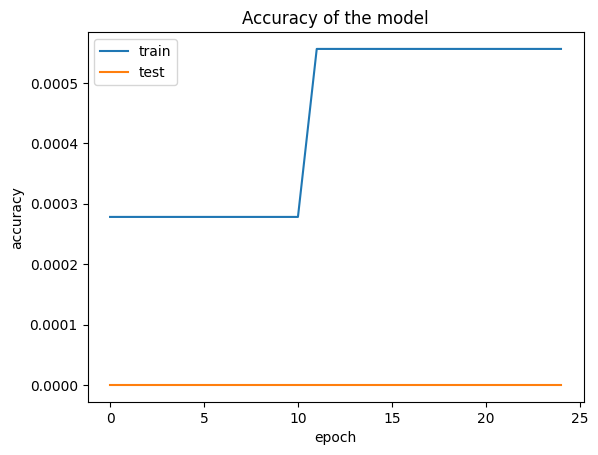

In [ ]:
#plot the accuracy 
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('Accuracy of the model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
print("Accuracy for 25 epoch with 100 Unit")
plt.show


Model loss for 25 epoch with 100 Unit


<function matplotlib.pyplot.show(close=None, block=None)>

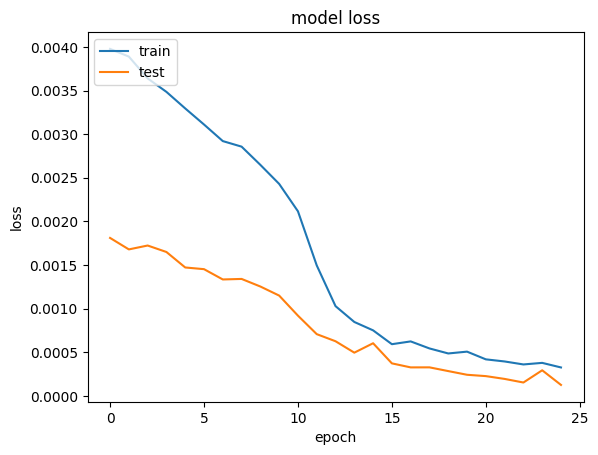

In [ ]:

#plot the losses
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
print("Model loss for 25 epoch with 100 Unit")
plt.show

In [ ]:
#use lstm on iceArea
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM, Dropout,Flatten

#'country','year','co2','land_use_change_co2','methane','nitrous_oxide'
x= sorted_list[['country','year','co2','land_use_change_co2']].values
y = sorted_list[['iceArea']].values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)

x_scale =MinMaxScaler()
y_scale =MinMaxScaler()

x_train_scaled = x_scale.fit_transform(x_train)
y_train_scaled = y_scale.fit_transform(y_train)
x_test_scaled = x_scale.fit_transform(x_test)

x_train_scaled,y_train_scaled =np.array(x_train_scaled),np.array(y_train_scaled)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(x_train_scaled, (x_train_scaled.shape[0],  x_train_scaled.shape[1], 1))
trainY = np.reshape(y_train_scaled, (y_train_scaled.shape[0], y_train_scaled.shape[1], 1))


# Create the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=False, input_shape=(trainX.shape[1], 1)))
# model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

optimizer = keras.optimizers.Adam(lr=0.0001)
# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error',metrics =['accuracy'])

# Train the model
lstm_history = model.fit(trainX, trainY, epochs=25, batch_size=4, shuffle=True, validation_split=0.20)

testX = np.array(x_test_scaled)
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

predictions = model.predict(testX)

x_pred = model.predict(trainX)

predictions= y_scale.inverse_transform(predictions)
x_pred = y_scale.inverse_transform(x_pred)


# calculate root mean squared error
trainScore = np.sqrt(np.mean((( predictions-y_test)**2)))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(np.mean(((x_pred - y_train)**2)))
print('Test Score: %.2f RMSE' % (testScore))

print("lstm_history", lstm_history.history.keys())



Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


899/899 [==============================] - 11s 9ms/step - loss: 0.1348 - accuracy: 0.0275 - val_loss: 0.0800 - val_accuracy: 0.0345
Epoch 2/25
899/899 [==============================] - 6s 7ms/step - loss: 0.0718 - accuracy: 0.0334 - val_loss: 0.0730 - val_accuracy: 0.0400
Epoch 3/25
899/899 [==============================] - 7s 8ms/step - loss: 0.0695 - accuracy: 0.0317 - val_loss: 0.0724 - val_accuracy: 0.0389
Epoch 4/25
899/899 [==============================] - 6s 7ms/step - loss: 0.0681 - accuracy: 0.0339 - val_loss: 0.0692 - val_accuracy: 0.0423
Epoch 5/25
899/899 [==============================] - 7s 8ms/step - loss: 0.0666 - accuracy: 0.0348 - val_loss: 0.0670 - val_accuracy: 0.0445
Epoch 6/25
899/899 [==============================] - 7s 7ms/step - loss: 0.0643 - accuracy: 0.0317 - val_loss: 0.0647 - val_accuracy: 0.0512
Epoch 7/25
899/899 [==============================] - 6s 7ms/step - loss: 0.0617 - accuracy: 0.0337 - val_loss: 0.0643 - val_accuracy: 0.0456
Epoch 8/25
899/8

Ice cover area Model loss for 25 epoch with 100 Unit


<function matplotlib.pyplot.show(close=None, block=None)>

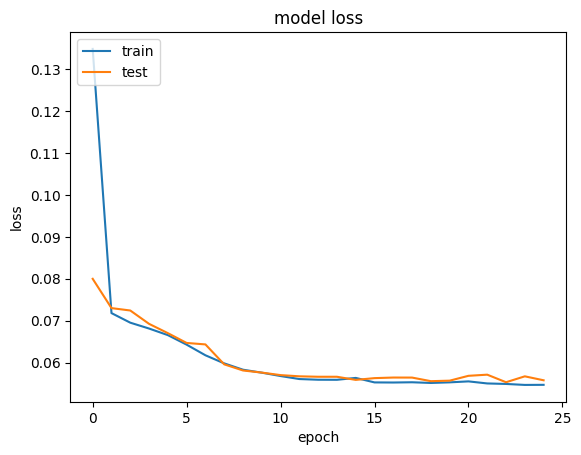

In [ ]:
#plot the losses
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
print("Ice cover area Model loss for 25 epoch with 100 Unit")
plt.show

ice area Accuracy for 25 epoch with 100 Unit


<function matplotlib.pyplot.show(close=None, block=None)>

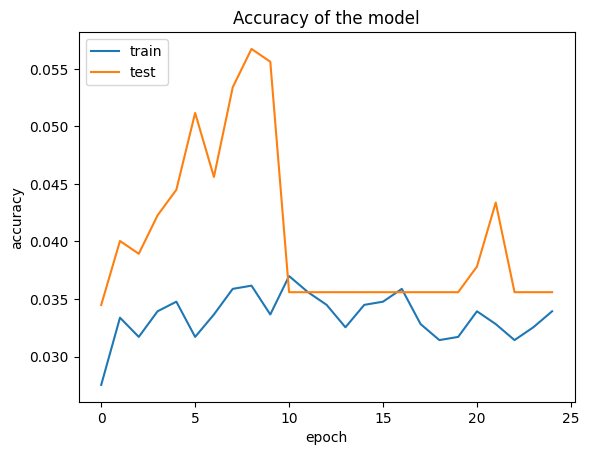

In [ ]:
#plot the accuracy 
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('Accuracy of the model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
print("ice area Accuracy for 25 epoch with 100 Unit")
plt.show

In [ ]:
#GRU
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM, Dropout,Flatten, GRU

#'country','year','co2','land_use_change_co2','methane','nitrous_oxide'
x= sorted_list[['country','year','co2','land_use_change_co2']].values
y = sorted_list[['total_ghg']].values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)

x_scale =MinMaxScaler()
y_scale =MinMaxScaler()

x_train_scaled = x_scale.fit_transform(x_train)
y_train_scaled = y_scale.fit_transform(y_train)
x_test_scaled = x_scale.fit_transform(x_test)

x_train_scaled,y_train_scaled =np.array(x_train_scaled),np.array(y_train_scaled)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(x_train_scaled, (x_train_scaled.shape[0],  x_train_scaled.shape[1], 1))
trainY = np.reshape(y_train_scaled, (y_train_scaled.shape[0], y_train_scaled.shape[1], 1))

gru_model = Sequential()
gru_model.add(GRU(units=100, return_sequences=False, input_shape=(trainX.shape[1], 1)))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(units=1))

optimizer = keras.optimizers.Adam(lr=0.0001)
# Compile the model
gru_model.compile(optimizer=optimizer, loss='mean_squared_error',metrics =['accuracy'])

# Train the model
gru_history = gru_model.fit(trainX, trainY, epochs=50, batch_size=4, shuffle=True, validation_split=0.20)

testX = np.array(x_test_scaled)
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

predictions = gru_model.predict(testX)

x_pred = gru_model.predict(trainX)

predictions= y_scale.inverse_transform(predictions)
x_pred = y_scale.inverse_transform(x_pred)


# calculate root mean squared error
trainScore = np.sqrt(np.mean((( predictions-y_test)**2)))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(np.mean(((x_pred - y_train)**2)))
print('Test Score: %.2f RMSE' % (testScore))

print("gru_history", gru_history.history.keys())



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


899/899 [==============================] - 9s 8ms/step - loss: 0.0041 - accuracy: 2.7816e-04 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 2/50
899/899 [==============================] - 6s 7ms/step - loss: 0.0035 - accuracy: 2.7816e-04 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 3/50
899/899 [==============================] - 6s 6ms/step - loss: 0.0031 - accuracy: 2.7816e-04 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 4/50
899/899 [==============================] - 7s 8ms/step - loss: 0.0025 - accuracy: 2.7816e-04 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 5/50
899/899 [==============================] - 6s 6ms/step - loss: 0.0015 - accuracy: 2.7816e-04 - val_loss: 4.8417e-04 - val_accuracy: 0.0000e+00
Epoch 6/50
899/899 [==============================] - 7s 8ms/step - loss: 7.1476e-04 - accuracy: 5.5633e-04 - val_loss: 3.2775e-04 - val_accuracy: 0.0000e+00
Epoch 7/50
899/899 [==============================] - 6s 6ms/step - loss: 5.1242e-04 - accuracy: 5.

Total GHG Accuracy for 50 epoch with 100 Unit


<function matplotlib.pyplot.show(close=None, block=None)>

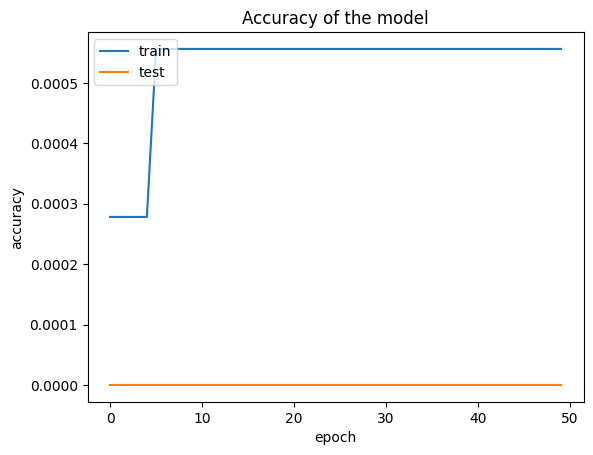

In [ ]:
#plot the accuracy
plt.plot(gru_history.history['accuracy'])
plt.plot(gru_history.history['val_accuracy'])
plt.title('Accuracy of the model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
print("Total GHG Accuracy for 50 epoch with 100 Unit")
plt.show


Total GHG Model loss for 50 epoch with 100 Unit


<function matplotlib.pyplot.show(close=None, block=None)>

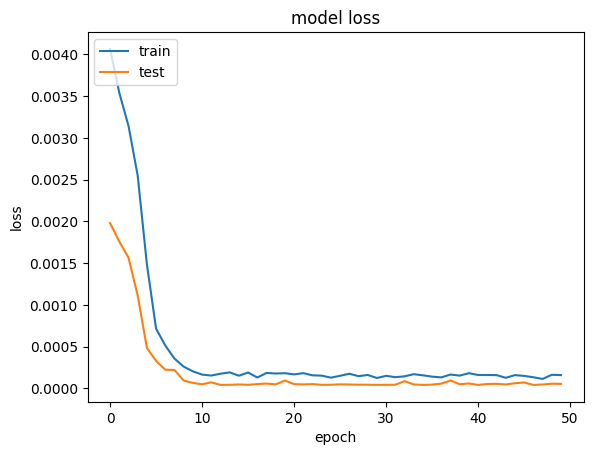

In [ ]:
#plot the losses
plt.plot(gru_history.history['loss'])
plt.plot(gru_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
print("Total GHG Model loss for 50 epoch with 100 Unit")
plt.show

In [ ]:
#1D CNN
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM, Dropout,Flatten, GRU
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

#'country','year','co2','land_use_change_co2','methane','nitrous_oxide'
x= sorted_list[['country','year','co2','land_use_change_co2']].values
y = sorted_list[['total_ghg']].values


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)

x_scale =MinMaxScaler()
y_scale =MinMaxScaler()

x_train_scaled = x_scale.fit_transform(x_train)
y_train_scaled = y_scale.fit_transform(y_train)
x_test_scaled = x_scale.fit_transform(x_test)

x_train_scaled,y_train_scaled = np.array(x_train_scaled),np.array(y_train_scaled)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(x_train_scaled, (x_train_scaled.shape[0],  x_train_scaled.shape[1], 1))
trainY = np.reshape(y_train_scaled, (y_train_scaled.shape[0], y_train_scaled.shape[1], 1))


# Create the 1D CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters = 75 , kernel_size =2, activation='relu' ,input_shape=(trainX.shape[1], 1)))
# model.add(LSTM(units=50))
cnn_model.add(MaxPooling1D(pool_size =2))
cnn_model.add(Flatten())
cnn_model.add(Dense(100,activation='relu'))
cnn_model.add(Dense(units=1))

# optimizer = keras.optimizers.Adam(lr=0.0001)
# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error',metrics =['accuracy'])

# Train the model
cnn_model_hisotry = cnn_model.fit(trainX, trainY, epochs=500, batch_size=4, shuffle=True, validation_split=0.20)

testX = np.array(x_test_scaled)
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

predictions = cnn_model.predict(testX)

x_pred = cnn_model.predict(trainX)

predictions= y_scale.inverse_transform(predictions)
x_pred = y_scale.inverse_transform(x_pred)


# calculate root mean squared error
trainScore = np.sqrt(np.mean((( predictions-y_test)**2)))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(np.mean(((x_pred - y_train)**2)))
print('Test Score: %.2f RMSE' % (testScore))

print("cnn_history", cnn_model_hisotry.history.keys())


Epoch 1/500
899/899 [==============================] - 4s 4ms/step - loss: 0.0018 - accuracy: 5.5633e-04 - val_loss: 3.7504e-04 - val_accuracy: 0.0000e+00
Epoch 2/500
899/899 [==============================] - 3s 3ms/step - loss: 8.4110e-04 - accuracy: 5.5633e-04 - val_loss: 2.8449e-04 - val_accuracy: 0.0000e+00
Epoch 3/500
899/899 [==============================] - 2s 3ms/step - loss: 7.4200e-04 - accuracy: 5.5633e-04 - val_loss: 5.0560e-04 - val_accuracy: 0.0000e+00
Epoch 4/500
899/899 [==============================] - 3s 3ms/step - loss: 7.2337e-04 - accuracy: 5.5633e-04 - val_loss: 5.2575e-04 - val_accuracy: 0.0000e+00
Epoch 5/500
899/899 [==============================] - 2s 3ms/step - loss: 6.6409e-04 - accuracy: 5.5633e-04 - val_loss: 3.1744e-04 - val_accuracy: 0.0000e+00
Epoch 6/500
899/899 [==============================] - 3s 3ms/step - loss: 6.2751e-04 - accuracy: 5.5633e-04 - val_loss: 4.8613e-04 - val_accuracy: 0.0000e+00
Epoch 7/500
899/899 [=============================

Total GHG Model accuracy for 500 epoch with 75 filter


<function matplotlib.pyplot.show(close=None, block=None)>

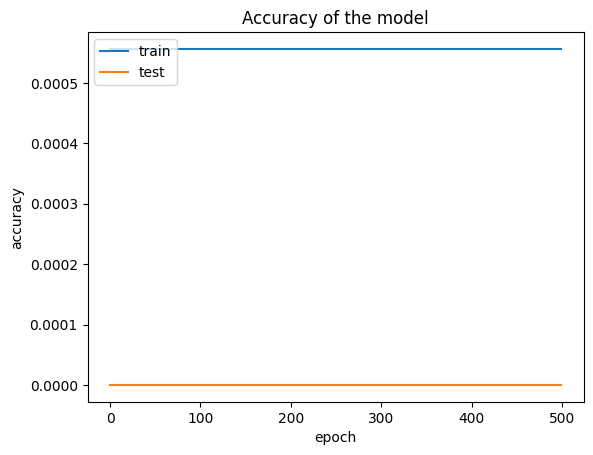

In [ ]:
#plot the accuracy
plt.plot(cnn_model_hisotry.history['accuracy'])
plt.plot(cnn_model_hisotry.history['val_accuracy'])
plt.title('Accuracy of the model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
print("Total GHG Model accuracy for 500 epoch with 75 filter")
plt.show

Total GHG Model loss for 500 epoch with 75 filter


<function matplotlib.pyplot.show(close=None, block=None)>

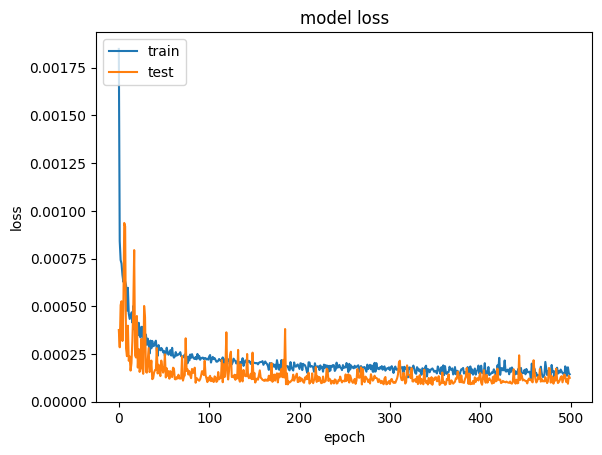

In [ ]:
#plot the losses
plt.plot(cnn_model_hisotry.history['loss'])
plt.plot(cnn_model_hisotry.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
print("Total GHG Model loss for 500 epoch with 75 filter")
plt.show